# <font color="firebrick"> CNYT Ciencias Naturales y Tecnología </font>
# <font color="firebrick"> Introducción a la Computación Cuántica </font>
### <font color="firebrick"> Escuela Colombiana de Ingeniería Julio Garavito 2019-2 </font>

***

# Teoría cuántica básica

### El experimento de Stern-Gerlach y el *spin*

<img src="S-G.png"
     style="float: center" />

# Conceptos

* Probabilidad de que el sistema se encuentre en un estado básico después de realizarse una observación 
* Vectores estado y sus múltiplos
* Vector normalizado
* Spin 
* Notación de Dirac: bra y ket
* Amplitud de transición de un estado inicial a un estado final
* Observables: vectores y valores propios
* Valor esperado y varianza
* Valor esperado y varianza de un observable con respecto a un estado dado
* Conmutador

In [1]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import OperacionesNumerosComplejos as nc
import VectoresYMatrices as vm

# Ejemplo 1: Partícula sobre una línea

<img src="line.png"
     style="float: center" />
     
Estado del sistema:

$$|\psi\rangle = c_0|x_0\rangle + c_1|x_1\rangle + c_2|x_2\rangle + c_3|x_3\rangle + c_4|x_4\rangle + c_5|x_5\rangle$$

Probabilidad de que el sistema se encuentre en el estado $i$ después de ser observado:

$$\mathrm{P}_i = \frac{|c_i|^2}{|\ |\psi\rangle \ |^2} = \frac{|c_i|^2}{|c_0|^2 + |c_1|^2 + |c_2|^2 + |c_3|^2 + |c_4|^2 + |c_5|^2}$$

Lo cual se denota por:

$$ |\psi\rangle \leadsto |x_i\rangle$$

Vector de probabilidades: [0.072 0.358 0.072 0.233 0.265]


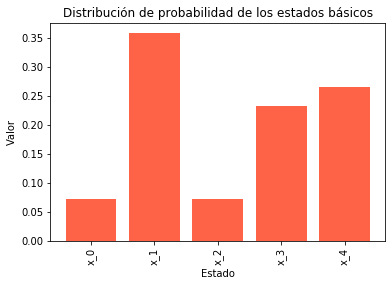

In [2]:
# Estado genérico del sistema de posición de una partícula sobre una línea.
psi = [[[2, -1]],
       [[3, 4]],
       [[-1, 2]],
       [[4, 0.5]],
       [[-3.5, 2.5]]
      ]

psi = vm.escalar_por_matriz([1,0], psi) # En esta línea podemos investigar qué pasa con múltiplos escalares del vector estado.

# Cálculo de las probabilidades P_i

probs = vm.matriz_cero(len(psi), 1)

for i in range(len(psi)):
    probs[i] = nc.modulo(psi[i][0])**2 / vm.norma_vector(psi)**2  


# Impresión de la distribución de probabilidades
probs = np.round(probs, 3)  

print('Vector de probabilidades:', probs)
labels = ['x_0', 'x_1', 'x_2', 'x_3', 'x_4']
index = np.arange(len(labels))
plt.bar(index, probs, color='tomato')
plt.xlabel('Estado')
plt.ylabel('Valor')
plt.xticks(index, labels, rotation=90)
plt.title('Distribución de probabilidad de los estados básicos')
plt.show()

En general, trabajaremos con vectores **normalizados**, es decir, con norma 1. Para normalizar un vector simplemente lo dividimos entre su norma:

$$ \text{Vector original: } \quad |\psi\rangle \qquad \longrightarrow \qquad \frac{|\psi\rangle}{|\ |\psi\rangle \ |} \qquad \text{Vector normalizado}$$

Todo lo anterior es válido y se generaliza para cualquier sistema cuántico.

# Ejemplo 2: Spin (con respecto al eje $z$)

<img src="spin.png"
     style="float: center" />
     
Estado del sistema:

$$|\psi\rangle = c_0|\uparrow\rangle + c_1|\downarrow\rangle$$

Probabilidad de que el sistema se encuentre en el estado $\uparrow$ después de ser observado:

$$\mathrm{P}_{\uparrow} = \frac{|c_0|^2}{|\ |\psi\rangle \ |^2} = \frac{|c_0|^2}{|c_0|^2 + |c_1|^2}$$

Lo cual se denota por:

$$ |\psi\rangle \leadsto |\uparrow\rangle$$

Respectivamente, tenemos:

Probabilidad de que el sistema se encuentre en el estado $\downarrow$ después de ser observado:

$$\mathrm{P}_{\downarrow} = \frac{|c_1|^2}{|\ |\psi\rangle \ |^2} = \frac{|c_0|^2}{|c_0|^2 + |c_1|^2}$$

Lo cual se denota por:

$$ |\psi\rangle \leadsto |\downarrow\rangle$$

Vector de probabilidades: [0.839 0.161]


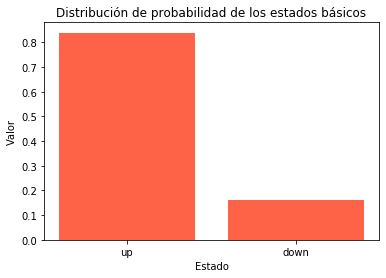

In [3]:
# Estado genérico del sistema de spin (con respecto al eje z) de una partícula.
psi = [[[9, -7]],
       [[-3, 4]],
      ]

psi = vm.escalar_por_matriz([1,0], psi) # En esta línea podemos investigar qué pasa con múltiplos escalares del vector estado.

# Cálculo de las probabilidades P_i

probs = vm.matriz_cero(len(psi), 1)

for i in range(len(psi)):
    probs[i] = nc.modulo(psi[i][0])**2 / vm.norma_vector(psi)**2  


# Impresión de la distribución de probabilidades
probs = np.round(probs, 3)  

print('Vector de probabilidades:', probs)
labels = ['up', 'down']
index = np.arange(len(labels))
plt.bar(index, probs, color='tomato')
plt.xlabel('Estado')
plt.ylabel('Valor')
plt.xticks(index, labels, rotation=0)
plt.title('Distribución de probabilidad de los estados básicos')
plt.show()

## Amplitud de transición de un estado inicial a un estado final

Aunque este concepto es delicado y esta operación carece de sentido al aplicarla indiscriminadamente, vale la pena que mencionemos esto y lo tengamos presente

$$ \text{Estado inicial: } \quad |\psi\rangle \qquad \leadsto \qquad |\phi\rangle \quad \text{Estado final (después de hacerse una observación del sistema)}$$

La *amplitud de transición* de $|\psi\rangle$ a $|\phi\rangle$ (donde los vectores deben encontrarse normalizados) se define como:

$$ \langle \phi , \psi \rangle = \langle \phi | \psi \rangle = \langle \phi || \psi \rangle = |\phi\rangle^{\dagger}|\psi\rangle  $$

# Importante: primero el *final* y después el *inicial*

### Notación bra-ket de Dirac

* Ket: $|\phi\rangle$ (vector columna)
* Bra: $\langle \psi| = |\psi\rangle^{\dagger}$ (vector fila)
* Braket: $\langle \phi, \psi \rangle$ o $\langle \phi | \psi \rangle$ (producto interno)

In [4]:
# Estado genérico del sistema de spin (con respecto al eje z) de una partícula.
psi = [[[9, -7]],
       [[-3, 4]],
      ]
# Estado final del sistema de spin (inicialmente es 'up')
phi = [[[1, 0]],
       [[0, 0]],
      ]

# Amplitud de transición de psi a phi
amplitud_tr = vm.producto_interno(phi, psi)
print('Amplitud de transición de psi a phi:', amplitud_tr)

Amplitud de transición de psi a phi: [9, -7]


## ¡Cuidado!

## Ahora comparemos con

In [5]:
# Estado genérico del sistema de spin (con respecto al eje z) de una partícula.
psi = [[[9, -7]],
       [[-3, 4]],
      ]
# Estado final del sistema de spin (inicialmente es 'up')
phi = [[[1, 0]],
       [[0, 0]],
      ]

# Amplitud de transición de psi a phi
psi = vm.escalar_por_matriz([1/vm.norma_vector(psi),0],psi)
phi = vm.escalar_por_matriz([1/vm.norma_vector(phi),0],phi)
amplitud_tr = vm.producto_interno(phi, psi)
print('Amplitud de transición de psi a phi:', amplitud_tr)


Amplitud de transición de psi a phi: [0.722897396012249, -0.5622535302317492]


### ¿Qué pasa si tomamos el módulo al cuadrado de este número?

In [6]:
p = nc.modulo(amplitud_tr)**2
print(p)

0.8387096774193546


# Observables

<img src="spin3d.png"
     style="float: center" />
     
Como vemos del sistema de ejes, podemos medir el spin con respecto a los ejes $x$ e $y$. Todo aquello que podamos medir de un sistema cuántico estará representado por un **observable** $\Omega$. Un *observable* es un operador autoadjunto o, equivalentemente, una matriz hermitiana.

Los observables para el spin con respecto a los ejes $z$, $x$ e $y$ son:

$$S_z = \frac{\hbar}{2}\begin{bmatrix} 1 & 0 \\ 0 & -1\end{bmatrix} $$

$$S_x = \frac{\hbar}{2}\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} $$

$$S_y = \frac{\hbar}{2}\begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix} $$

## Pero entonces, ¿qué hemos estado midiendo/obervando antes, cuando no hablábamos de obervables?

En realidad, sí estabamos usando observables, por ejemplo el observable correspondiente al sistema de posición de la partícula sobre la línea (ejemplo 1) es:

$$\Omega = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 \\ % 
                  0 & 1 & 0 & 0 & 0 \\ %
                  0 & 0 & 2 & 0 & 0 \\ %
                  0 & 0 & 0 & 3 & 0 \\ %
                  0 & 0 & 0 & 0 & 4 \end{bmatrix}$$
                  
## Pero, ¿dónde usamos esa matriz o qué usamos de ella?

# Respuesta: Sus vectores propios

Los vectores propios de esta matriz son (simplemente):

$$V_0 = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}, \quad %
  V_1 = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}, \quad %
  V_2 = \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}, \quad %
  V_3 = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}, \quad %
  V_4 = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$$ 
  
Es decir, los vectores correspondientes a los **estados básicos**.

Como cada vector propio está asociado a un **valor propio**, éstos también van a ser importantes, denotarán el valor que registrará nuestro instrumento de medición (en algún sistema de unidades) tras observar el sistema.

Los valores propios correspondientes a cada uno de estos vectores propios son:

$$ \lambda_0 = 0, \lambda_1 = 1, \lambda_2 = 2, \lambda_3 = 3, \lambda_4 = 4$$

Que, por ejemplo, podrían denotar a cuántas unidades de distancia nos encontramos con respecto al origen, que sería el punto $x_0$.

# Importante: Los valores propios de una matriz hermitiana siempre son números reales. Sus vectores propios siempre forman una base ortogonal (y si se toman normalizados, formarán una base ortonormal)

## Veamos cuáles son los vectores y valores propios correspondientes a los observables para el spin (vamos a omitir el factor $\frac{\hbar}{2}$)

$$S_z = \begin{bmatrix} 1 & 0 \\ 0 & -1\end{bmatrix}, \quad V_0 = \begin{bmatrix} 1 \\ 0 \end{bmatrix},  %
                                                                           V_1 = \begin{bmatrix} 0 \\ 1 \end{bmatrix},  %
                                                                     \quad \lambda_0 = 1, \lambda_1 = -1$$

$$S_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}, \quad V_0 = \begin{bmatrix} 1/\sqrt{2} \\ i/\sqrt{2} \end{bmatrix},  %
                                                                           V_1 = \begin{bmatrix} i/\sqrt{2} \\ 1/\sqrt{2} \end{bmatrix},  %
                                                                     \quad \lambda_0 = 1, \lambda_1 = -1$$


$$S_y = \begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix}, \quad V_0 = \begin{bmatrix} 1/\sqrt{2} \\ 1/\sqrt{2} \end{bmatrix},  %
                                                                           V_1 = \begin{bmatrix} 1/\sqrt{2} \\ -1/\sqrt{2} \end{bmatrix},  %
                                                                     \quad \lambda_0 = 1, \lambda_1 = -1$$
 

# Conceptos de valor esperado y varianza

<img src="dado.jpg"
     style="float: center" />
<img src="estadistica.png"
     style="float: center" />

## Apliquemos estos conceptos a los sistemas cuánticos

* **Valor esperado de un observable $\Omega$ con respecto a un estado $\psi$:**

$$\langle \Omega \rangle_{\psi} = \langle \Omega\psi, \psi \rangle = \langle \psi, \Omega\psi \rangle$$

* **Operador $\Delta$ con valor esperado 0** de un observable $\Omega$ con respecto a un estado $\psi$:

$$\Delta(\Omega)_{\psi} = \Omega - \langle \Omega \rangle_{\psi}  I $$

* **Varianza** de un observable $\Omega$ con respecto a un estado $\psi$:

$$\langle \Delta(\Omega)_{\psi} \star \Delta(\Omega)_{\psi}  \rangle_{\psi}$$

In [7]:
# Estado genérico del sistema de spin 
psi = [[[9, -7]],
       [[-3, 4]]
      ]

#psi = [[[1/np.sqrt(2), 0]],
#       [[0, 1/np.sqrt(2)]]
#      ]


# Estado normalizado
psi = vm.escalar_por_matriz([1/vm.norma_vector(psi),0], psi)

# Observable (S_y) 

Omega = [[[0,0],[0,-1]],
         [[0,1],[0,0]]
        ]
# Valor esperado
VE = vm.producto_interno(vm.producto_de_matrices(Omega, psi) ,psi)
print('Valor esperado de Omega con respecto al estado psi:', VE)

# Definición del operador Delta
I = [[[1,0],[0,0]],
     [[0,0],[1,0]]
    ]
Delta = vm.suma_de_matrices(Omega, vm.escalar_por_matriz([-1*VE[0],0], I))

# Varianza del observable Omega con respecto al estado psi

DeltaCuadrado = vm.producto_de_matrices(Delta, Delta)
Var = vm.producto_interno(vm.producto_de_matrices(DeltaCuadrado, psi) ,psi)
print('Varianza de Omega con respecto al estado psi:', Var )
print('Desviación estándar de Omega con respecto al estado psi:', Var[0]**0.5)

Valor esperado de Omega con respecto al estado psi: [0.19354838709677424, 0.0]
Varianza de Omega con respecto al estado psi: [0.9625390218522374, -2.7755575615628914e-17]
Desviación estándar de Omega con respecto al estado psi: 0.9810907306932614


# Conmutador

El *conmutador* de dos observables se define como:

$$[\Omega_1, \Omega_2] = \Omega_1\star\Omega_2 - \Omega_2\star\Omega_1$$